In [17]:
import pandas as pd
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=df = pd.DataFrame({
    'image_path': ['archive/plantvillage-dataset/color/Apple___Black_rot/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047.JPG'],
    'label': ['1']
})
df


,image_path,label
0,archive/plantvillage-dataset/color/Apple___Bla...,1


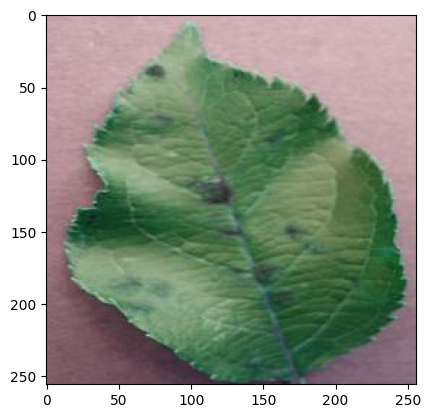

In [19]:
img=cv2.imread("archive\\plantvillage-dataset\\color\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
plt.imshow(img)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    # batch_size=1,
    class_mode='sparse',
    shuffle=False
)
test_generator

Found 1 validated image filenames belonging to 1 classes.


In [21]:
import tensorflow as tf
new_model = tf.keras.models.load_model('best_model_accuracy.keras')


In [22]:
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 5, 5,      │ 21,802,784 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_3[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 3, 3,      │          0 │ resnet50[0][0]    │
│ (MaxPooling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 2, 2,      │          0 │ inception_v3[0][… │
│ (MaxPooling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 3, 3,      │          0 │ efficientnetb0[0… │
│ (MaxPooling2D)      │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2048)      │          0 │ max_pooling2d_4[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2048)      │          0 │ max_pooling2d_5[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1280)      │          0 │ max_pooling2d_6[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 5376)      │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │  2,753,024 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │      2,052 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 82,140,593 (313.34 MB)

 Trainable params: 14,972,724 (57.12 MB)

 Non-trainable params: 37,222,419 (141.99 MB)

 Optimizer params: 29,945,450 (114.23 MB)

In [23]:
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load the Keras model
# model = load_model('D:\yuvraj\plant village\best_model_accuracy.keras')

# Prepare your input data
# Assuming the model expects a shape (batch_size, height, width, channels)
# For example, if it's an image, it might look like this:
  # Replace with your actual input data

# Use the model to predict
predictions = new_model.predict(test_generator)

# Display the predictions
print(predictions)


d:\yuvraj\plant village\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[4.1139129e-04 1.0477091e-03 9.9846339e-01 7.7568344e-05]]


In [24]:
np.argmax(predictions, axis=1)

array([2], dtype=int64)